<a href="https://colab.research.google.com/github/kevalsharma97/NLP/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import time
from sklearn import linear_model
# importing pandas to read dataset
import pandas as pd

# importing train_test_split for splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [9]:
start_time = time.time()
# Reading dataset from specified location
dataset=pd.read_csv('/content/drive/My Drive/housing.csv')

# To remove any incomplete rows
dataset=dataset.dropna()

print("First 10 rows :")
dataset.head(n=10)

First 10 rows :


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc71ddfafd0>,
      dtype=object)

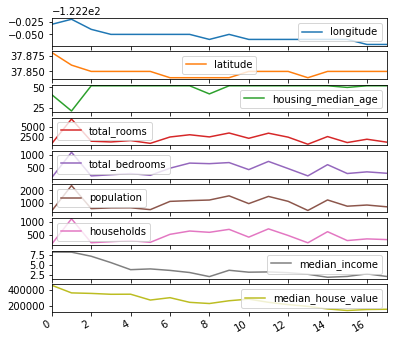

In [10]:
# Plotting the first 10 rows of dataset on graph
dataset.head(18).plot(subplots=True, figsize=(6,6))

In [0]:
# Storing the median_house_value in a variable for future prediction
Y=dataset['median_house_value']

# Storing rest of the columns in another variable to predict value of other column
X=dataset.loc[:,'longitude':'median_income']

In [12]:
# Splitting the dataset such that 70% data is used for training and 30% data for testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
print("There are " + str(x_train.size)+ " training entries and " + str(x_test.size) + " testing entries!")

# Converting the training data to numpy arrays as pytorch works only with numpy models
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

# Converting the testing data to numpy arrays 
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

There are 114424 training entries and 49040 testing entries!


In [0]:
# model=linear_model.LinearRegression()
# model.fit(x_train,y_train)

In [0]:
# predictions=model.predict(x_test)
# mse=mean_squared_error(y_test,predictions)
# print("The model's mean squared error is: " + str(mse))

# r2 = r2_score(y_test,predictions)
# print("R2 score : " +str(r2))

In [0]:
# Importing the pytorch library
import torch

# Importing 1D convolution layer
from torch.nn import Conv1d

# Importing the max pooling layer
from torch.nn import MaxPool1d

# Importing the flatten layer
from torch.nn import Flatten

# Importing the linear layer
from torch.nn import Linear

# Importing RELU activation fucntion  
from torch.nn.functional import relu

# Importing Dataloader and TensorDataset to work with dataset
from torch.utils.data import DataLoader, TensorDataset

In [0]:
# Defining a class as a subclass of torch.nn.Module
class CnnRegressor(torch.nn.Module):
  
  # Initialization method
  def __init__(self,batch_size,inputs,outputs):
  
    # Initializing the superclass and storing the parameters
    super(CnnRegressor,self).__init__()
  
    self.batch_size=batch_size
    self.inputs=inputs
    self.outputs=outputs

    # Defining the input layer
    self.input_layer=Conv1d(inputs,batch_size,1)

    # Defining the max pooling layer
    self.max_pooling_layer = MaxPool1d(1)

    # Defining another convolution layer
    self.conv_layer = Conv1d(batch_size,128,1)

    # Defining flatten layer
    self.flatten_layer=Flatten()

    # Defining linear layer
    self.linear_layer = Linear(128,64)

    # Defining the output layer
    self.output_layer = Linear(64,outputs)

  # A method that feeds inputs through the model
  def feed(self,input):

    # Reshaping the entry so that it can be fed to input layer
    input=input.reshape((self.batch_size,self.inputs,1))

    # Getting the output of 1st layer and running it through the ReLU activation function
    output=relu(self.input_layer(input))

    output=self.max_pooling_layer(output)

    # Getting the output of 2nd layer and running it through the ReLU activation function
    output=relu(self.conv_layer(output))

    output=self.flatten_layer(output)

    # Getting the output of linear layer and running it through the ReLU activation function
    output=self.linear_layer(output)

    # Storing the output of output layer
    output=self.output_layer(output)

    return output

In [27]:
# from torch.optim import SGD
# from torch.optim import Adagrad

# Importing the Adam optimizer from torch module
from torch.optim import Adam
from torch.nn import L1Loss
!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

In [18]:
# Defining the batch size 
batch_size=64

model=CnnRegressor(batch_size,X.shape[1],1)

# Setting the model to use the GPU for processing
model.cuda()

CnnRegressor(
  (input_layer): Conv1d(8, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [0]:
# This method returns average L1Loss and R2 score of the passed model on the passed DataLoader
def model_loss(model, dataset, train=False,optimizer= None):
  performance = L1Loss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0

  for input,output in iter(dataset):
    
    # Getting model's predictions for training dataset
    predictions = model.feed(input)
    
    loss = performance(predictions, output)

    score_metric.update([predictions,output])
    score=score_metric.compute()

    if(train):

      # Clear any errors so they don't appear
      optimizer.zero_grad()

      # Compute gradients for optimizer
      loss.backward()

      # Use the optimizer to update the model's parameters based on the gradients
      optimizer.step()
    
    # Store the loss and update the counter
    avg_loss+= loss.item()
    avg_score+= score
    count+=1
  
  return avg_loss/count,avg_score/count

In [30]:
# Defining the number of epochs to train for
epochs = 100

# Defining the optimizer for better performance

# optimizer = SGD(model.parameters(),lr=1e-5)
# optimizer=Adagrad(model.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
optimizer=Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

# Converting the training set into torch variables
inputs=torch.from_numpy(x_train_np).cuda().float()
outputs=torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().float()

# Creating DataLoader instance to work with batches 
tensor=TensorDataset(inputs, outputs)
loader=DataLoader(tensor, batch_size, shuffle=True,drop_last=True)

for epoch in range(epochs):
  avg_loss,avg_r2_score=model_loss(model,loader,train=True,optimizer=optimizer)

print("Epoch " +str(epoch+1) +":\n\tLoss = " +str(avg_loss) + "\n\tR2 Score = " +str(avg_r2_score))

Epoch 100:
	Loss = 47113.212741732066
	R2 Score = 0.6463740002519015


In [31]:
# Converting the testing set into torch variables
inputs=torch.from_numpy(x_test_np).cuda().float()
outputs=torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().float()

# Creating DataLoader instance to work with batches 
tensor=TensorDataset(inputs, outputs)
loader=DataLoader(tensor,batch_size,shuffle=True,drop_last=True)

avg_loss,avg_r2_score = model_loss(model,loader)

# Output the performnce of the model
print("Model's L1 loss is : " +str(avg_loss))
print("Model's R2 score is : " +str(avg_r2_score))
print("Inference time : %s seconds" % (time.time() - start_time))

Model's L1 loss is : 48927.012376644736
Model's R2 score is : 0.6831342908639345
Inference time : 497.9881889820099 seconds
